<a href="https://colab.research.google.com/github/2pterons/training/blob/main/MachineLearning/%EA%B8%B0%EC%B4%88%ED%8E%B8_3_1_%EC%B5%9C%EA%B7%BC%EC%A0%91_%EC%9D%B4%EC%9B%83_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 최근접 이웃 회귀


### 지난시간 복습

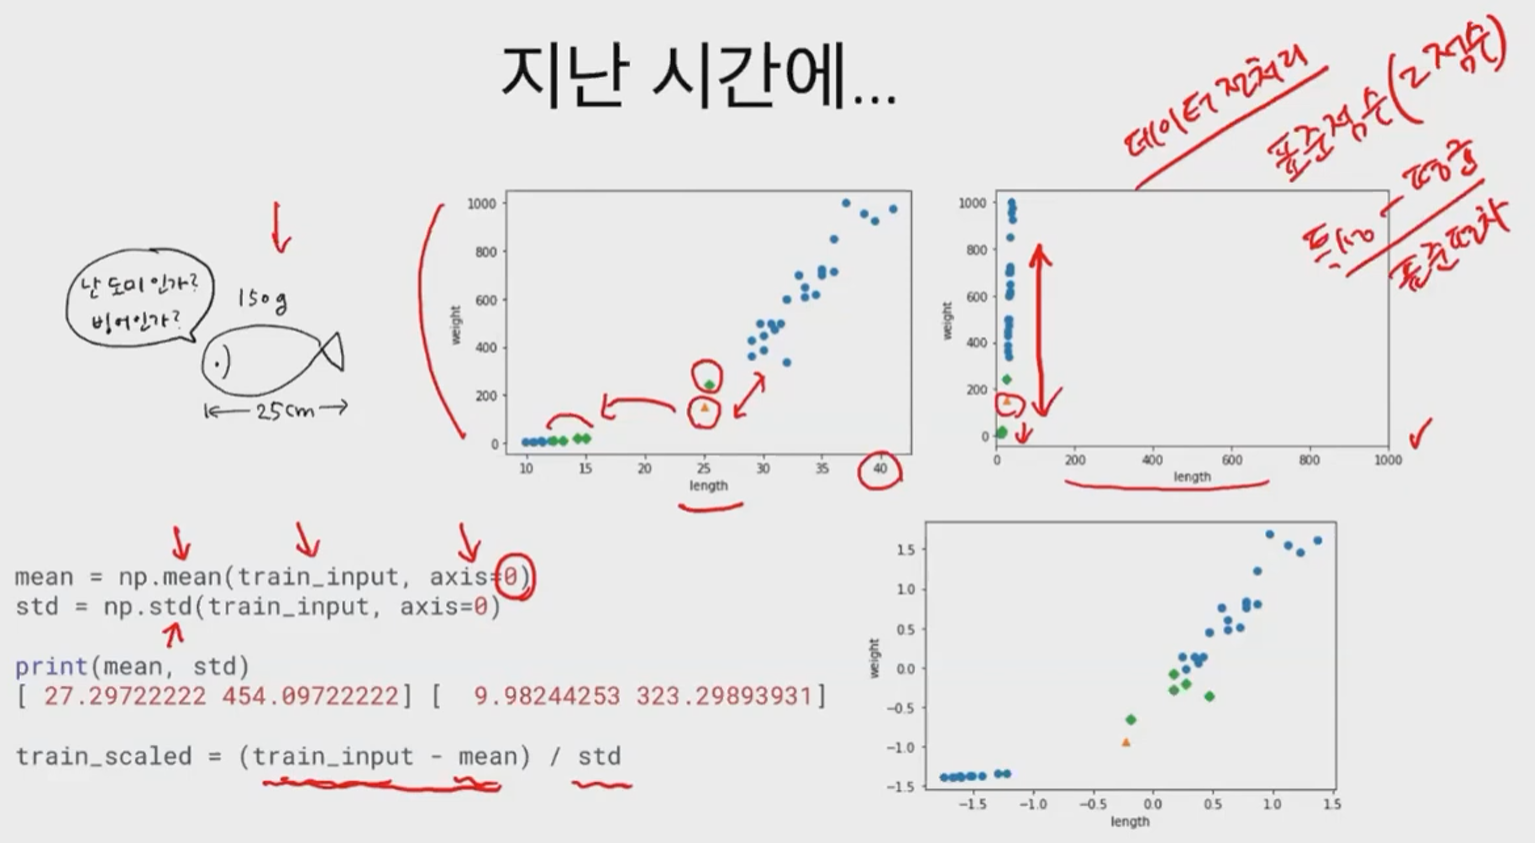

최근접이웃은 가장 가까운 이웃을 찾기 때문에 스케일에 굉장히 민감한 모델이다.  
따라서 특성의 스케일을 맞추어야 어떤 특정 특성의 알고리즘이 좌지우지되지 않고 공정하게 평가할 수 있다.  
어떤 특성을 어떤 모델이 사용하기 적합하도록 가공하는 작업을 했었고 이것을 데이터 전처리라고 한다.  
그 첫번째 작업으로 스케일을 조정하는 것인데, 많이 사용하는 방법중 하나가 ```표준점수``` 혹스 ```Z점수```라고 하는 방법이다. 특성을 평균으로 빼고 표준편차로 나누는 작업을 말하며 우리는 지난 시간에 넘파이 라이브러리를 이용하여 이것을 수동으로 구하는 작업을 실습했었다.  

또한 std(표준편차), mean(평균)과 train_input 데이터가 모두 넘파이였기 때문에 브로드 캐스팅이 적용되는 것을 확인했었다.

여기서 주의해야 했던 부분은 '수상한 도미'데이터 역시 훈련세트의 mean과 표준편차를 차용하여 스케일을 조정해야 했다는 점이다.  
훈련세트를 기준으로 데이터를 변경하지 않으면 훈련세트로 학습한 모델을 제대로 사용할 수 없다는 것을 기억하자.  
(훈련세트에 사용한 전처리 통계값으로 테스트세트 또는 새로운 샘플에 대한 전처리를 해야한다.)

### 회귀(Regression)
이제까지는 도미와 빙어를 구분하는 분류 문제를 수행했었다.  
이번시간에는 회귀(Regression)을 배워보자!  
지도학습은 크게 분류(Classification)과 회귀(Regression)으로 나뉘며  
회귀는 물고기의 무게를 예측하는 등의 방법을 말한다.  
따라서 일반적으로 종류를 구분하는 것이 아니라 임의의 숫자를 구분하는 것을 회귀(regression)이라고 부른다.  
  
지난 시간까지 배웠던 이진분류는 타깃 값을 0과 1로 구분하였는데, 회귀에서는 예측하는 대상이 ```임의의 숫자```이기 때문에 타깃값이 바로 임의의 숫자(무게)이다.  
따라서 가상으로 만든 코드값(0,1)이 아니라 실제 데이터가 타깃이 되므로 타깃을 따로 만들 필요가 없이 데이터의 열중의 하나(예측하고자 하는 값)가 타깃 값이 되는 것이다.  


[짤막한 지식]
골턴 ( 19세기 )  
Regression toward the mean..  
회귀라는 말로만 접근한다면 무슨 의미인지 알기 어려울 것이다.  
회귀는 19세기 골턴이라는 사람이 부모의 키가 자식에게 영향을 주지 않고 자식들의 키는 해당 세대들에 맞춰(?) 회귀한다는 연구 결과를 발표하여 이에 영향을 받아 아직까지도 회귀라는 일종의 관용어(?)로 사용된다.  
따라서 의미로 해당 학문을 해석하려 한다면 오류가 있을 수 있다.  

### k-최근접 이웃 회귀
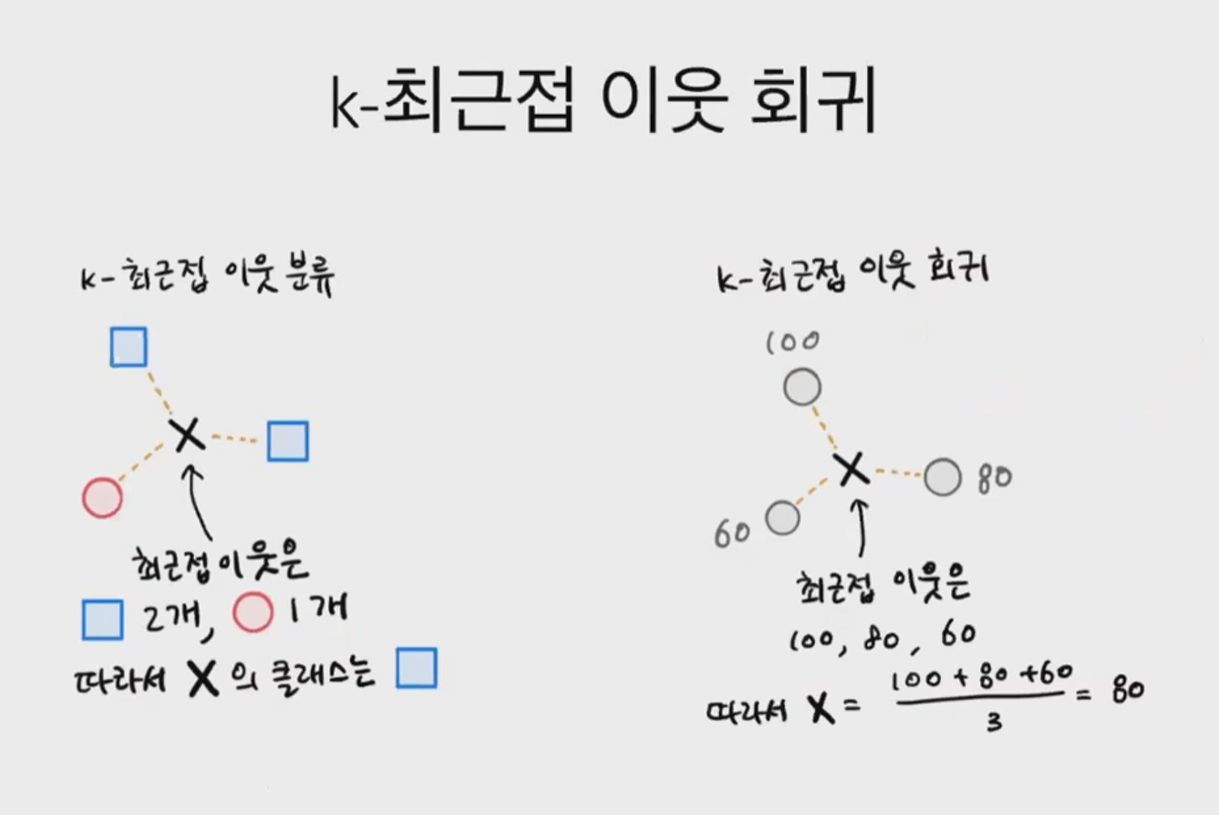

근접한 이웃들의 평균을 낸다면 해당 값을 예측할 수 있다.

### 농어의 무게 예측
- 농어의 길이만 사용

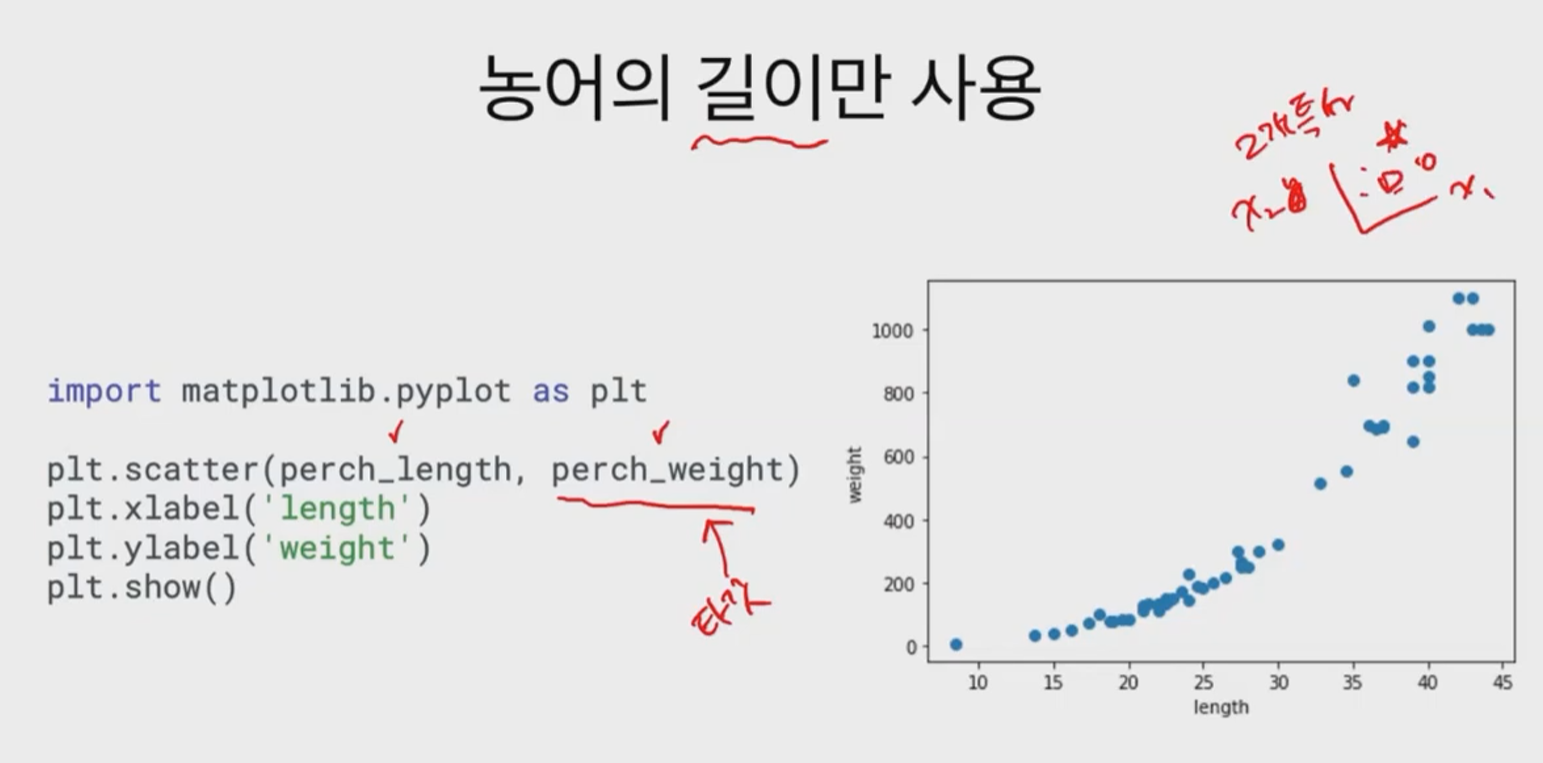

In [20]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

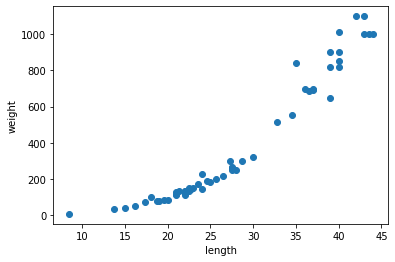

In [22]:
import matplotlib.pyplot as plt

# 특성을 length 하나만 사용했다.
plt.scatter(perch_length, perch_weight) # perch_weight가 타깃값
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


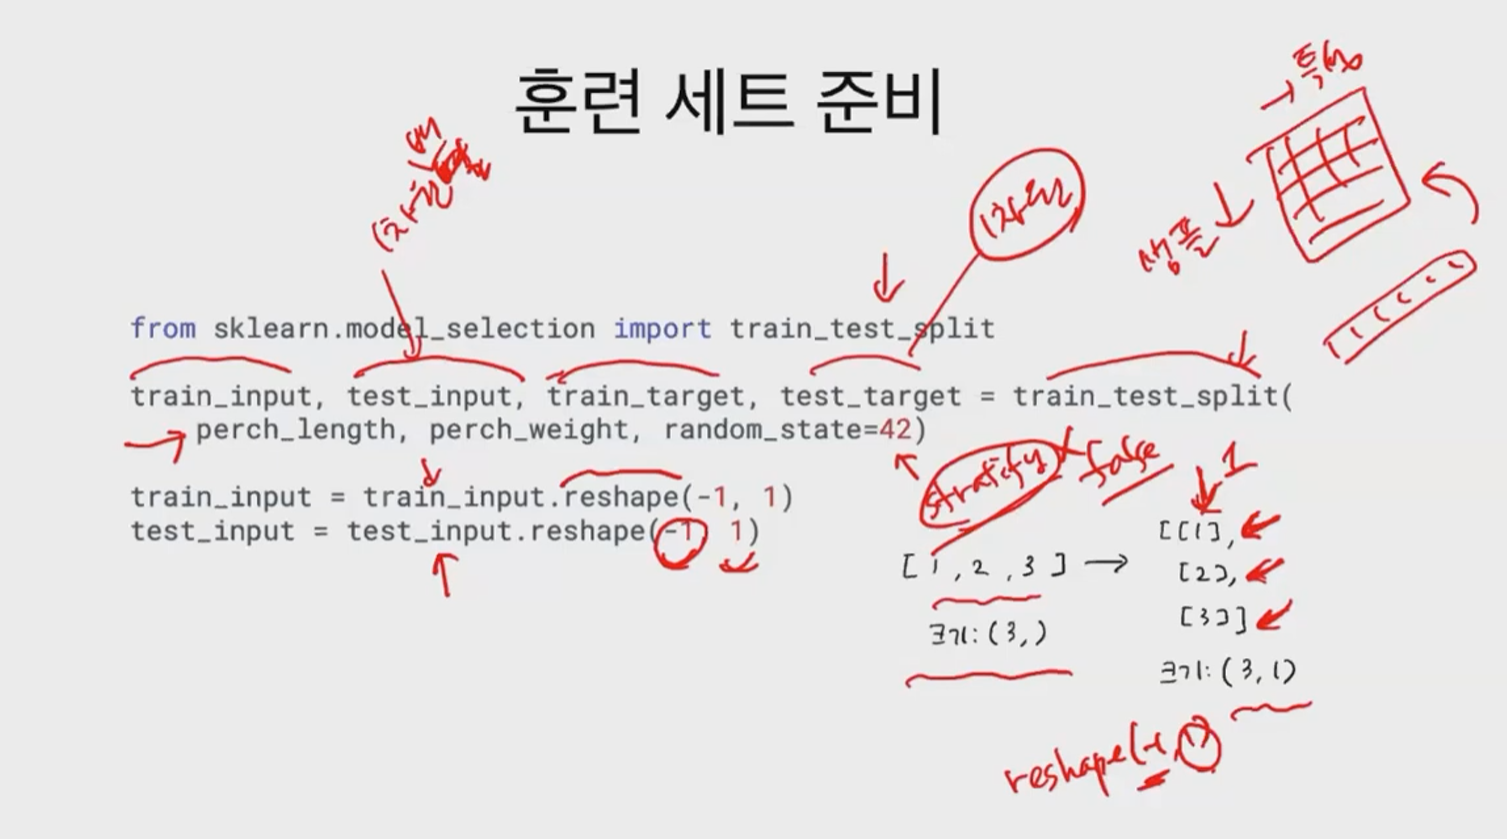

In [23]:
from sklearn.model_selection import train_test_split

# 길이 특성 하나만 사용하는 1차원 배열이다. 따라서 train_input과 test_input 역시 1차원 배열로 나눠져 나온다.
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42) # 지난 시간과는 다르게 회귀 문제이므로 stratify 파라메터를 사용하지 않는다.

# 지난 시간에도 말했듯이 사이킷런의 모델들은 입력데이터가 2차원 배열이라고 기대하고 있다.
# 열에 특성이 있고 샘플이 행에 존재한다. 따라서 1차원 배열의 모양을 2차원으로 바꿔줄 필요가 있다.
# 이 때 넘파이의 reshape() 매서드이다.
train_input = train_input.reshape(-1, 1) # 첫번재 행 차원을 -1, 두번째 차원을 1로 두었다. 
test_input = test_input.reshape(-1, 1)
# 두번째 차원을 1로 두면 하나의 열이 있는 2차원 배열이 만들어진다. 행ㅇ차원이 -1은 나머지 차원이 다 결정되고 나머지 차원을 다 사용하겠다는 의미이다. 즉 남은 차원을 다 할당해주는 것이다.
# 따라서 전체 샘플의 길이를 그대로 첫번째 차원에 사용하기 때문에 원소의 갯수는 변하지 않고 형태만 바꿀 수 있다.
'''
크기: (3, ) = [1, 2, 3] 
-> 크기: (3, 1) = [[1],
                  [2],
                  [3]]
'''
print(train_input)

[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]]


### 훈련

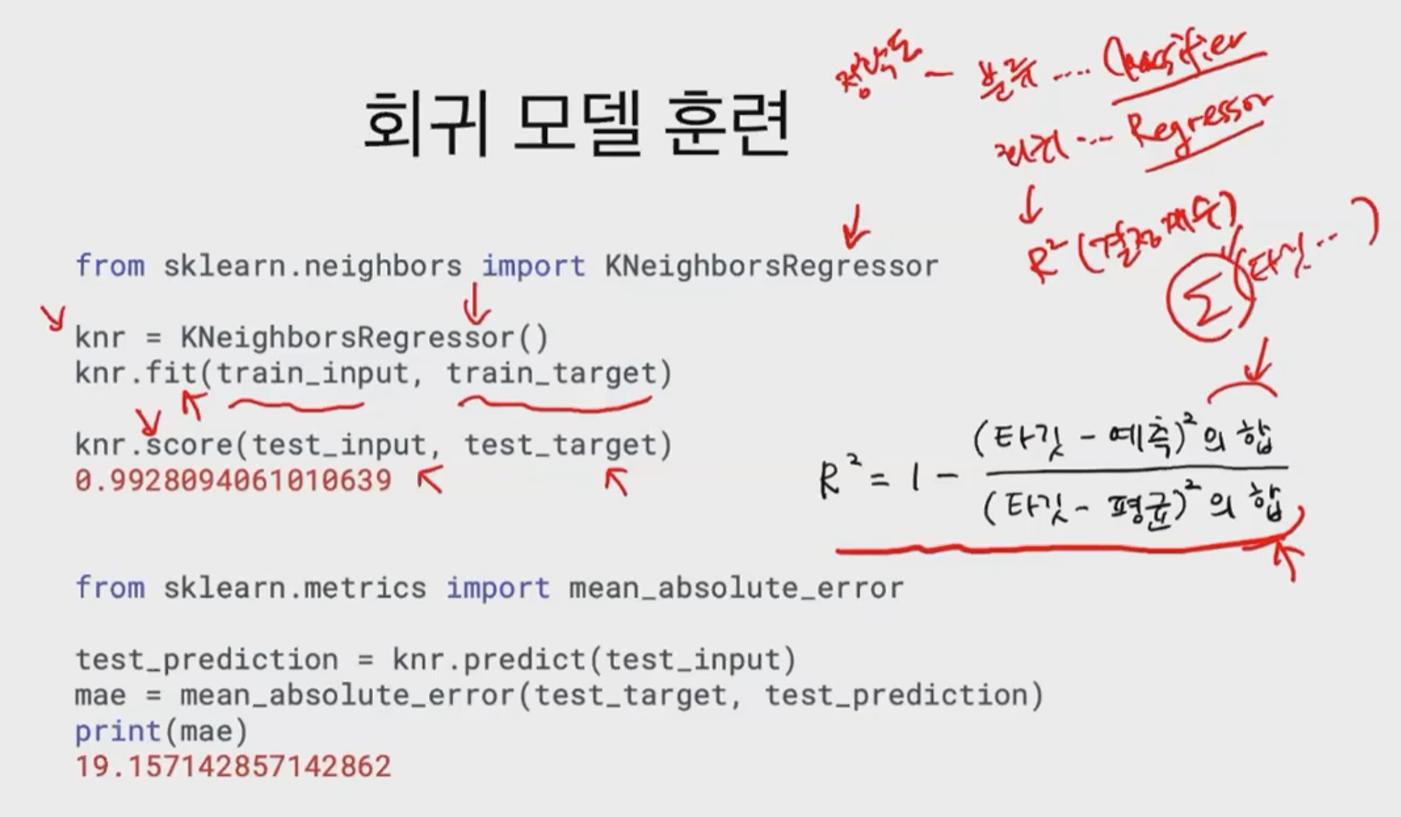

예측이 평균과 비슷해지면 분모와 분자가 비슷해지므로 1에 가까워지고 R스케어가 0에 가까워진다.  
반대로 예측이 타겟을 정확하게 맞춘다면 분자가 0이 되고(우측(분수)합이 0이 되고) R스케어는 1에 가까운 것이 된다.  
따라서 0에서 1 사이의 값을 구하며, 1에 가까울 수록 좋은 회귀모델, 1에서 멀어져 0에 가까우면 별로 좋지 않은 모델이라고 한단한다.  

In [24]:
# 분류 및 회귀 클래스의 형태
# 분류 : ...Classifier
# 회귀 : ...Regressor

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
knr.score(test_input, test_target)

print(knr.score(test_input, test_target))

0.992809406101064


위와 같은 R스케어 말고도 다른 지표를 사용하여 모델의 성능을 판단할 수 있는데,  
회귀 모델 같은 경우 편균 절대값 오차(mean_absolute_error)이나 평균 제곱근 오차(squard error)가 있다.  
metrics 모듈에 많이 존재하니 하나하나 확인해보도록 하자.

In [25]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)
print(knr.predict(test_input))
mae = mean_absolute_error(test_target, test_prediction) #첫번재 매개변수에 타깃값과 test_input으로 예측한 값을 두번째 매개변수에 할당하여 계산한다.
print(mae) #결과를 보면 대략 72g 정도 오차가 난다고 볼 수 있다. 
# 절대값 오차이기 때문에 예측값, 타깃값보다 높게 혹은 낮게 예측했는지는 중요하지 않다. 

[  60.    79.6  248.   122.   136.   847.   311.4  183.4  847.   113.
 1010.    60.   248.   248. ]
19.157142857142862


### 과대적합과 과소적합

지금까지는 모델을 훈련하고 훈련 세트로 훈련을하고 테스트 세트를 이용하여 평가를 해보았는데, 훈련 세트와 테스트 세트를 둘 다 이용해서 평가해본다면 어떨지 확인해보자 

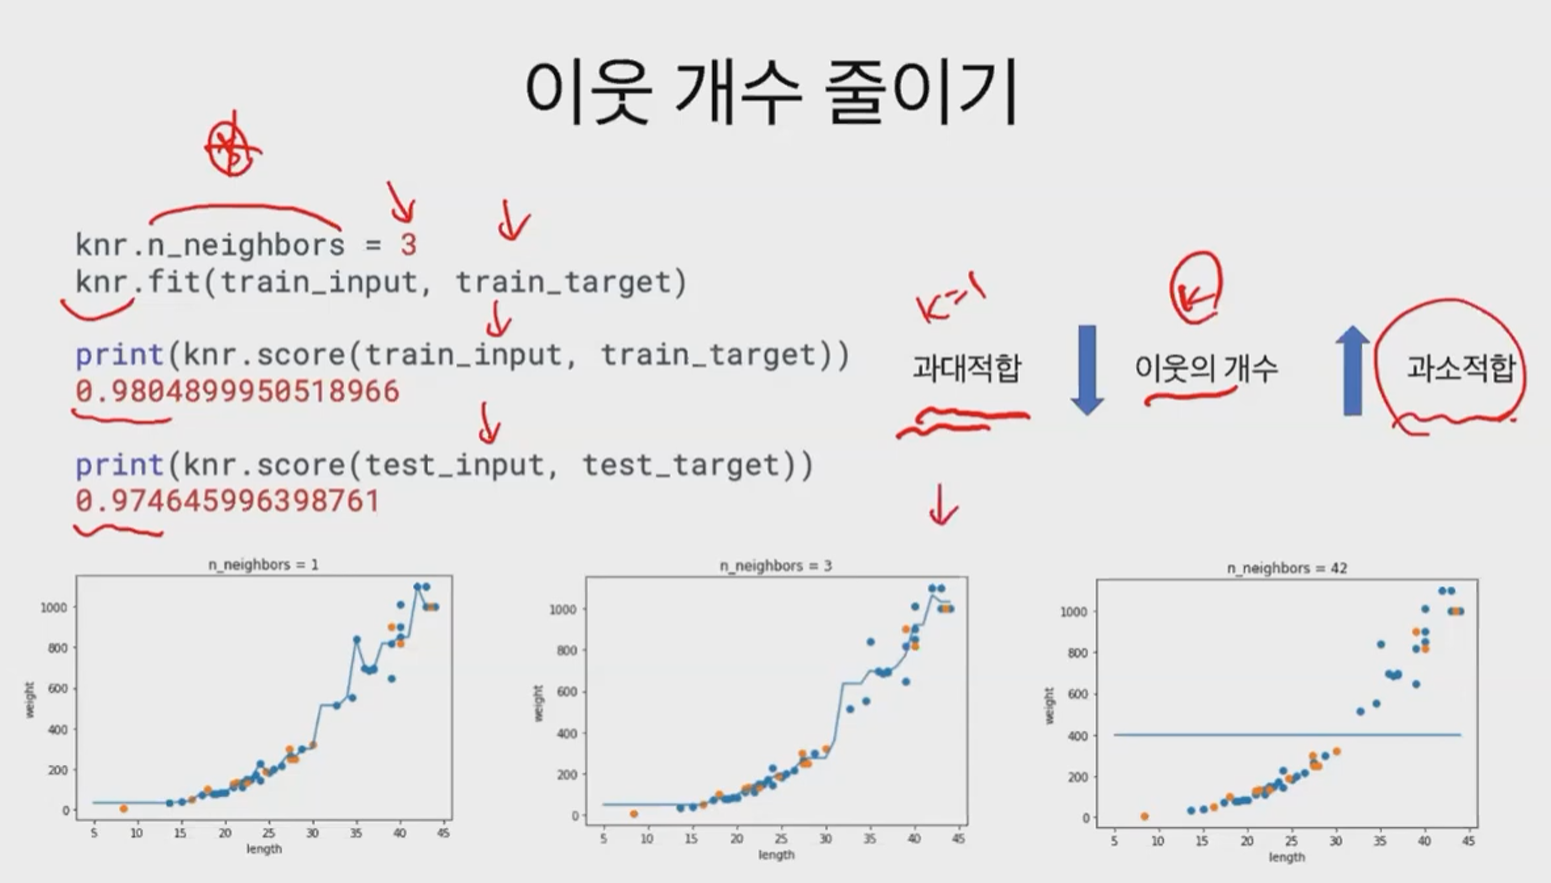


In [26]:
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9698823289099254
0.992809406101064


상식적인 부분이지만 훈련했을 때의 점수가 테스트 점수에 비해 높게 나오는 것이 일반적이다.   
하지만 위 결과는 반대의 결과를 보이고 있다.  
이런 현상을 훈련세트를 적절히 학습하지 못했다고 해서 ```과소적합(underfitting)```했다고 한다.  
이와 반대의 경우는 너무 훈련세트에만 잘 맞아서 테스트세트 혹은 실전에 투입했을 때 형편없는 현상을 ```과대적합(overfitting) 또는 과적합```이라고 한다. 이 부분은 3장에서 다시 보도록 하자.  
먼저 지금 발생한 문제 과소적합에 대한 해결법을 찾아보도록 하자.
  
k-최근접이웃에서 k(이웃)의 갯수를 극단적으로 늘리면 과소적합이 되고,(k의 개수를 전체로 두면 하나의 값만 예측한다?)  
극단적으로 k의 개수를 줄이면 과대적합이 된다.  
따라서 극단적으로 k=1 이면 가까운 이웃 하나만 고려하기 때문에 훈련세트의 전체적인 경향을 따르지 못하고 샘플 하나에 따라가는 아주 들죽날쭉한 예측을 만들어낸다.  


In [28]:
knr.n_neighbors = 3
knr.fit(train_input, train_target)

print(knr.score(train_input, train_target))

print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609


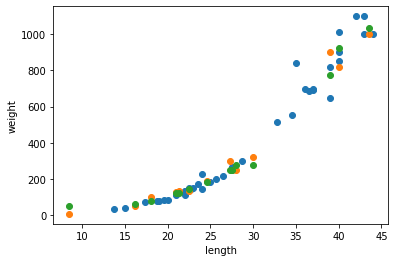

In [33]:
import matplotlib.pyplot as plt

plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)

knr.n_neighbors = 3
plt.scatter(test_input, knr.predict(test_input))
plt.xlabel('length')
plt.ylabel('weight')

plt.show()

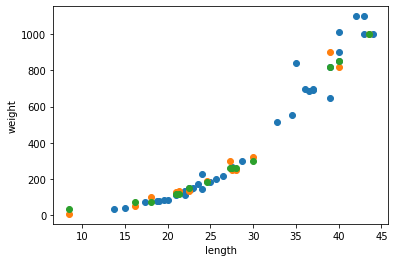

In [34]:
import matplotlib.pyplot as plt

plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)

knr.n_neighbors = 1
plt.scatter(test_input, knr.predict(test_input))
plt.xlabel('length')
plt.ylabel('weight')

plt.show()

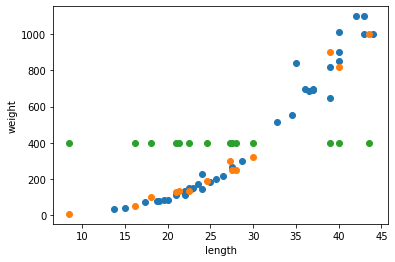

In [35]:
import matplotlib.pyplot as plt

plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)

knr.n_neighbors = 42
plt.scatter(test_input, knr.predict(test_input))
plt.xlabel('length')
plt.ylabel('weight')

plt.show()